<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

# Load Packages

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as KMEANS
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create dataset

In [2]:
X, y = make_blobs(n_samples=100, centers=5, random_state=101)

m = X.shape[0]
n = X.shape[1]

np.unique(y)

array([0, 1, 2, 3, 4])

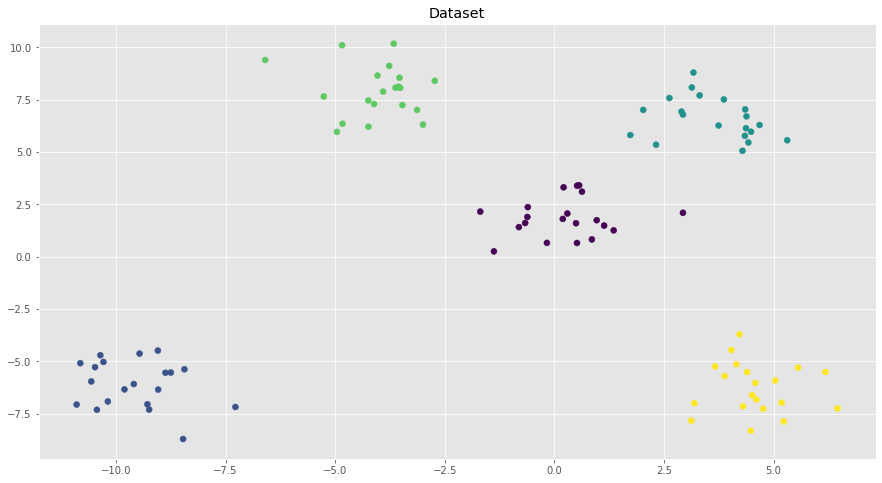

In [3]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Dataset')
plt.show()

# KMeans Implementation

In [4]:
def euclidean_distance(x1, x2):
    """ Calculates the l2 distance between two vectors """
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

class KMeans():
    """A simple clustering method that forms k clusters by iteratively reassigning
    samples to the closest centroids and after that moves the centroids to the center
    of the new formed clusters.


    Parameters:
    -----------
    k: int
        The number of clusters the algorithm will form.
    max_iter: int
        The number of iterations the algorithm will run for if it does
        not converge before that. 
    """
    def __init__(self, k=2, max_iter=500):
        self.k = k
        self.max_iter = max_iter

    def _init_random_centroids(self, X):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def _closest_centroid(self, sample, centroids):
        """ Return the index of the closest centroid to the sample """
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        return closest_i

    def _create_clusters(self, centroids, X):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    def _calculate_centroids(self, clusters, X):
        """ Calculate new centroids as the means of the samples in each cluster  """
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def _get_cluster_labels(self, clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        """ Do K-Means clustering and return cluster indices """

        # Initialize centroids as k random samples from X
        centroids = self._init_random_centroids(X)
        # measure of sum of clusters variance
        # last_var_sum = float('inf') # save for convergence check

        # Iterate until convergence or for max iterations
        for _ in range(self.max_iter):
            # Assign samples to closest centroids (create clusters)
            clusters = self._create_clusters(centroids, X)
            # Calculate new centroids from the clusters
            centroids = self._calculate_centroids(clusters, X)
            # If sum of clusters variance increased => convergence
            # var_sum = np.sum([np.var(X[clusters[i]]) for i in range(len(clusters))])
            # if var_sum >= last_var_sum:
            #     break
            # else:
            #     last_var_sum = var_sum

        return self._get_cluster_labels(clusters, X), clusters, centroids

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
<center>

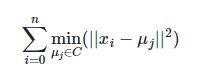

</center>
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

* Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

* Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

In [5]:
model = KMeans(k=5, max_iter=50)

In [6]:
output = model.predict(X)
y_pred = output[0]
clusters = output[1]
centroids = output[2]

In [7]:
# evaluate with ARI metric
adjusted_rand_score(y, y_pred)

0.710021659886946

In [8]:
# evaluate belonging to clusters
silhouette_score(X, y_pred, random_state=42)

0.5783564787694625

# Visualize clusters and centroids

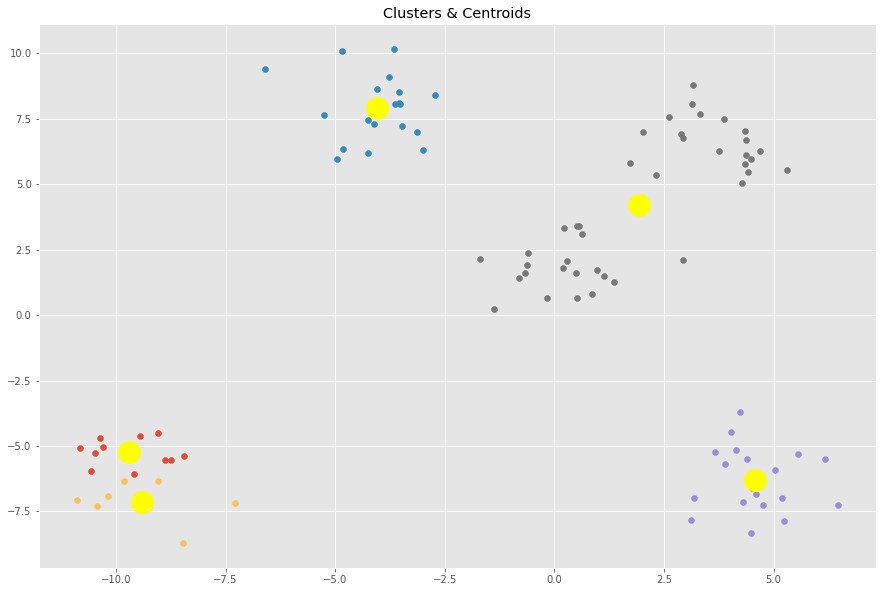

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

for i, cluster in enumerate(clusters):
    plt.scatter(X[cluster][:,0], X[cluster][:,1])
plt.scatter(centroids[:,0], centroids[:,1], s=500, c='yellow')
plt.title('Clusters & Centroids')
plt.show()

# SKlearn Implementation

In [10]:
kmeans = KMEANS(n_clusters=5, init='random', max_iter=50, random_state=42)

In [11]:
kmeans.fit(X)
kmeans.predict(X)

array([1, 3, 4, 1, 2, 2, 0, 4, 3, 3, 2, 3, 3, 2, 2, 2, 0, 2, 4, 2, 4, 1,
       4, 2, 2, 1, 3, 1, 4, 2, 3, 0, 4, 3, 3, 4, 1, 1, 3, 2, 0, 4, 2, 2,
       0, 4, 1, 3, 3, 3, 1, 1, 0, 4, 3, 1, 2, 0, 4, 4, 3, 1, 0, 0, 4, 2,
       1, 4, 3, 1, 4, 1, 0, 1, 0, 2, 0, 1, 3, 0, 3, 4, 0, 4, 1, 0, 0, 2,
       3, 0, 4, 2, 1, 0, 3, 4, 1, 0, 0, 2], dtype=int32)

In [12]:
kmeans.n_iter_

3

In [13]:
# evaluate with ARI metric
adjusted_rand_score(y, kmeans.labels_)

1.0

In [14]:
# evaluate belonging to clusters
silhouette_score(X, kmeans.labels_, random_state=42)

0.7548175686198038

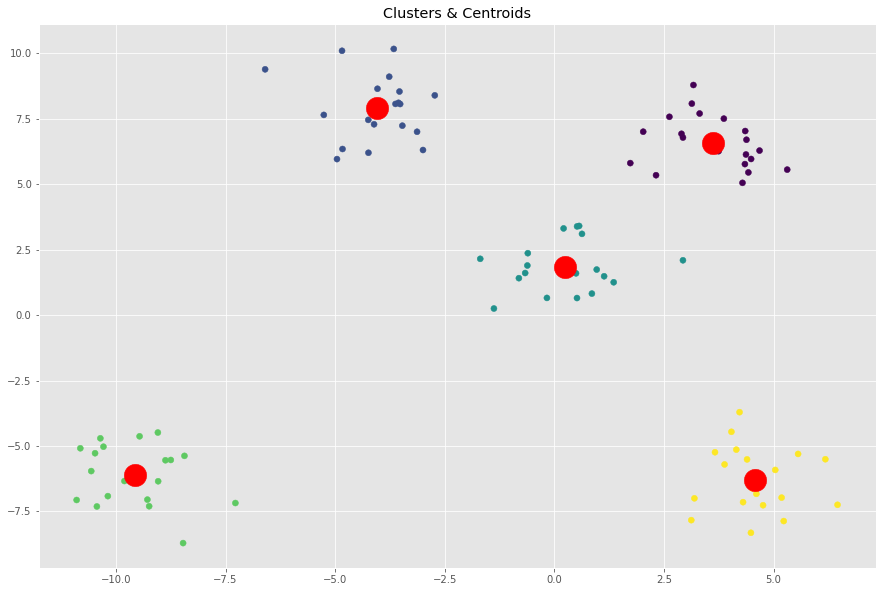

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=500, c='red')
plt.title('Clusters & Centroids')
plt.show()

# Picking optimal k value

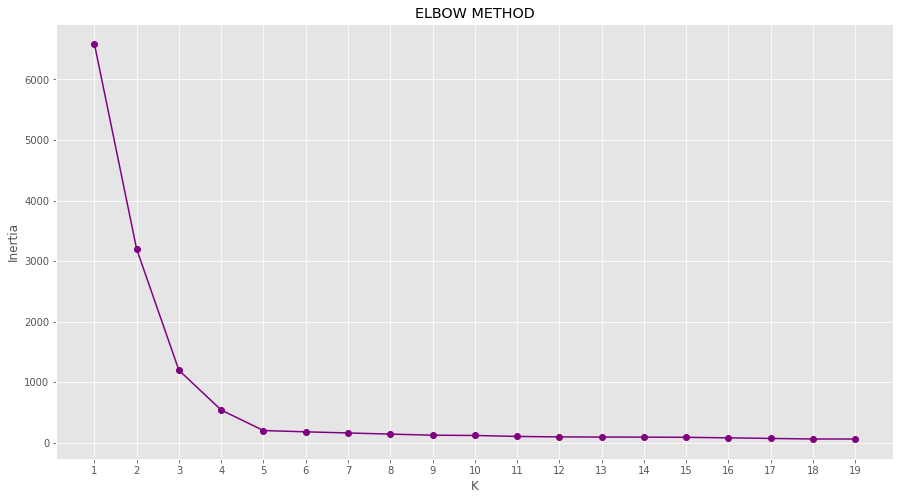

In [16]:
elbow=[]
for i in range(1, 20):
    kmeans = KMEANS(n_clusters=i, init='random', random_state=101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

plt.style.use('ggplot')
plt.figure(figsize=(15,8))

plt.plot(range(1, 20), elbow, '-o', color='purple')
plt.title('ELBOW METHOD')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.xticks(range(1,20))
plt.show()

> # At **k=4**, there is high decrease in inertia with the lowest number of clusters.

In [17]:
kmeans = KMEANS(n_clusters=4, init='random', random_state=101)
kmeans.fit(X)

KMeans(init='random', n_clusters=4, random_state=101)

In [18]:
kmeans.n_iter_

2

In [19]:
# evaluate with ARI metric
adjusted_rand_score(y, kmeans.labels_)

0.7755102040816326

In [20]:
# evaluate belonging to clusters
silhouette_score(X, kmeans.labels_, random_state=101)

0.6823156428934393